In [1]:
import pandas as pd
import joblib
import os
import gc

In [2]:
def predict(data, models):

    model_list = []
    for path in ['models_DART_all_56corr_pcaslope_lag_SEED42/']:
        for fname in os.listdir(path):
            for model_name in models:
                if model_name in fname:
                    model_list.append(path + fname)

    pred_list = []
    for model_path in model_list:
        print(model_path)
        print('{:.02f} MB'.format(os.path.getsize(model_path)/1000000))
        model = joblib.load(model_path)
        pred_list.append(model.predict(data))
    
    return pred_list, model_list

In [3]:
test = pd.read_parquet('Data/test_all_slopes_corr_pcaslope_lag.parquet')
corr_col = test.columns[test.columns.str.startswith('corr_')].to_list()


top_corr = [
    "corr_D_39-B_26",
    "corr_D_48-B_4",
    "corr_P_2-D_44",
    "corr_D_47-B_4",
    "corr_D_47-D_39",
    "corr_P_2-B_4",
    "corr_D_39-B_10",
    "corr_D_44-B_4",
    "corr_D_39-B_2",
    "corr_D_46-B_4",
    "corr_D_48-B_3",
    "corr_D_48-B_9",
    "corr_S_5-S_24",
    "corr_S_7-S_3",
    "corr_D_43-D_144",
    "corr_D_48-D_39",
    "corr_P_3-D_46",
    "corr_S_5-D_43",
    "corr_R_1-B_4",
    "corr_P_3-D_47",
    "corr_D_39-B_3",
    "corr_R_6-D_39",
    "corr_S_27-B_2",
    "corr_S_23-D_43",
    "corr_R_6-D_69",
    "corr_P_2-D_48",
    "corr_S_25-B_4",
    "corr_D_43-B_4",
    "corr_R_27-D_69",
    "corr_S_7-S_27",
    "corr_D_39-B_11",
    "corr_S_3-D_39",
    "corr_S_12-B_4",
    "corr_D_39-B_15",
    "corr_R_27-B_26",
    "corr_S_23-D_39",
    "corr_R_27-R_1",
    "corr_R_1-D_39",
    "corr_S_19-D_39",
    "corr_S_27-B_3",
    "corr_S_16-D_39",
    "corr_R_27-B_5",
    "corr_S_3-D_62",
    "corr_D_71-D_62",
    "corr_R_27-D_39",
    "corr_D_48-D_43",
    "corr_D_61-B_36",
    "corr_S_25-D_39",
    "corr_R_6-D_43",
    "corr_S_27-R_27",
    "corr_S_27-S_12",
    "corr_S_27-D_39",
    "corr_D_46-B_3",
    "corr_D_62-D_47",
    "corr_B_4-B_3",
    "corr_R_1-D_48",
]

corr_to_remove = set(corr_col).difference(set(top_corr))
test.drop(corr_to_remove, axis=1, inplace=True)

models = [
    'HT',
]

pred_list, model_list = predict(test, models)

models_DART_all_56corr_pcaslope_lag_SEED42/HT1_fold_3_iter_8939_score_0.79372.pkl
103.64 MB
models_DART_all_56corr_pcaslope_lag_SEED42/HT1_fold_2_iter_7599_score_0.79900.pkl
88.20 MB
models_DART_all_56corr_pcaslope_lag_SEED42/HT1_fold_4_iter_11707_score_0.79929.pkl
135.55 MB
models_DART_all_56corr_pcaslope_lag_SEED42/HT0_fold_1_iter_7572_score_0.79436.pkl
87.86 MB
models_DART_all_56corr_pcaslope_lag_SEED42/HT3_fold_3_iter_9242_score_0.79395.pkl
107.16 MB
models_DART_all_56corr_pcaslope_lag_SEED42/HT0_fold_4_iter_11275_score_0.79881.pkl
130.54 MB
models_DART_all_56corr_pcaslope_lag_SEED42/HT0_fold_3_iter_8565_score_0.79340.pkl
99.30 MB
models_DART_all_56corr_pcaslope_lag_SEED42/HT0_fold_2_iter_7224_score_0.79868.pkl
83.85 MB
models_DART_all_56corr_pcaslope_lag_SEED42/HT1_fold_1_iter_8296_score_0.79486.pkl
96.25 MB
models_DART_all_56corr_pcaslope_lag_SEED42/HT2_fold_2_iter_7950_score_0.79913.pkl
92.68 MB
models_DART_all_56corr_pcaslope_lag_SEED42/HT2_fold_0_iter_14785_score_0.80329.pkl
1

In [4]:
model_names = [model.split('/')[-1][:10] for model in model_list]
pred_df = pd.DataFrame(pred_list).T
pred_df.columns = model_names
pred_df.index = test.index

del test
_ = gc.collect()

In [8]:
sorted_columns = sorted(pred_df.columns)
pred_df = pred_df[sorted_columns]

In [19]:
pred_df = pd.read_csv('models_DART_all_56corr_pcaslope_lag_SEED42/p_M6_folds.csv', index_col='customer_ID')

In [23]:
std = pred_df.std(axis=1).sort_values(ascending=False)
high_std_indx = std[std > 0.05].index

<AxesSubplot:>

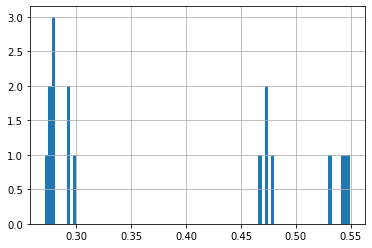

In [30]:
pred_df.loc['e1e3b9dc555f07ee53ee3c2fca78e7dc153e06fa7ffda798845a77d0982336fc'].hist(bins=100)

In [10]:
pred_df.to_csv('models_DART_all_56corr_pcaslope_lag_SEED42/p_M6_folds.csv')

In [11]:
pred_df.mean(axis=1).to_csv('models_DART_all_56corr_pcaslope_lag_SEED42/p_HT0123.csv', header=['prediction'])